# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

# Import MNIST Dataset and Split it into Training and Test dataset

In [2]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


5

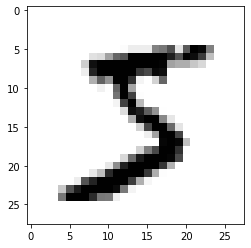

In [4]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
y_train[0]

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalize the Dataset

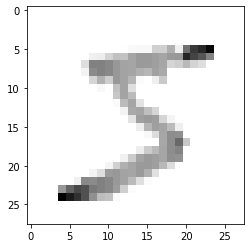

In [6]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Resizing Image to make it suitabe for convolution operation

In [8]:
x_train=np.array(x_train).reshape(-1,28,28,1)
x_test=np.array(x_test).reshape(-1,28,28,1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

# Create the Neutral Network

In [10]:
model=Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.3308 - accuracy: 0.8953 - val_loss: 0.1365 - val_accuracy: 0.9575
Epoch 2/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.1082 - accuracy: 0.9668 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.0877 - val_accuracy: 0.9738
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0777 - val_accuracy: 0.9761
Epoch 5/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0551 - val_accuracy: 0.9831


# Test the Model with Testing Dataset

In [14]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0497 - accuracy: 0.9861
0.04967819154262543
0.9861000180244446


In [15]:
prediction= model.predict([x_test])

In [16]:
print(prediction)

[[3.09630622e-07 9.09753544e-06 2.36122032e-05 ... 9.99960661e-01
  1.45901051e-08 3.39318149e-06]
 [1.14667400e-05 1.28593034e-04 9.99832749e-01 ... 6.92012145e-06
  1.19990491e-05 1.41126247e-06]
 [1.18406284e-07 9.99945045e-01 3.76067146e-06 ... 3.78009531e-06
  4.16823741e-06 1.45981248e-05]
 ...
 [7.38799386e-12 1.02642602e-07 7.17561288e-10 ... 3.43261240e-06
  1.11470745e-05 1.34880765e-05]
 [4.21199411e-06 1.69721091e-06 1.99436823e-09 ... 2.38594500e-09
  3.85767671e-05 1.77634029e-05]
 [2.53266389e-05 1.88347065e-06 1.49865591e-05 ... 2.00982360e-08
  1.73554399e-05 9.18988007e-06]]


# Predictions for Testing Dataset

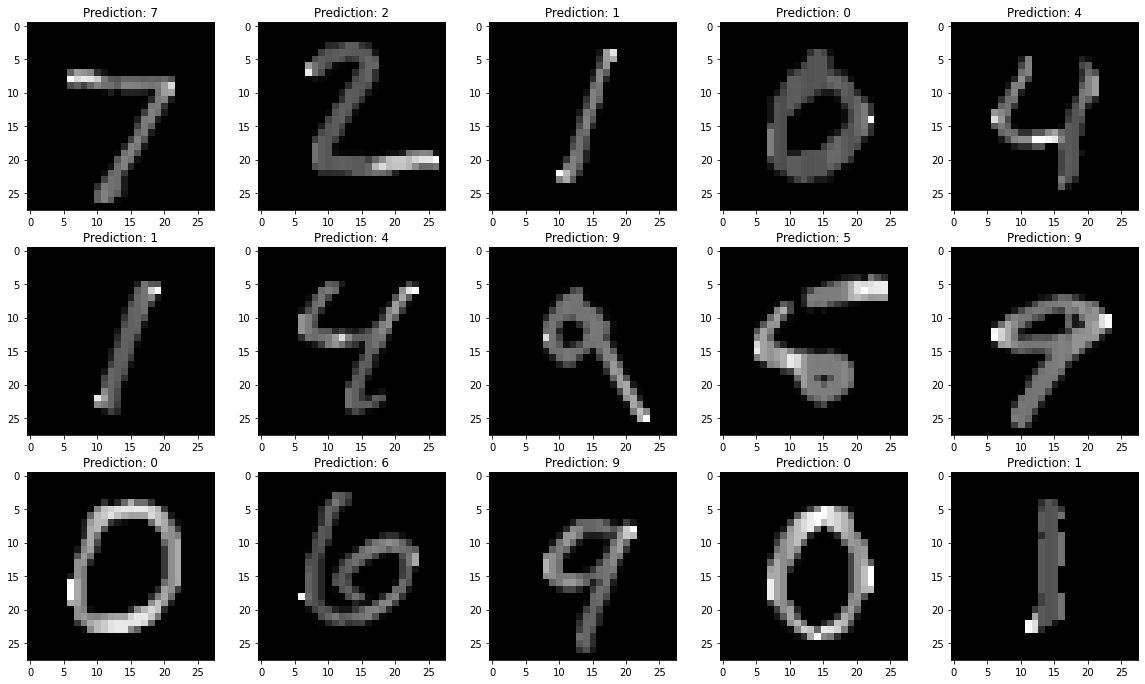

In [17]:
fig=plt.figure(figsize=(20,20))
for num in range(15):
    y=fig.add_subplot(5,5,num+1)
    y.imshow(x_test[num],cmap='gray')
    plt.title("Prediction: "+ str(np.argmax(prediction[num])))
plt.show()

# Prediction for the own handwritten data

Prediction: 2


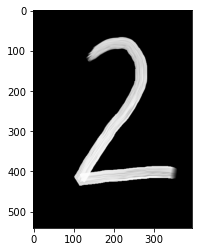

In [18]:
import cv2
img=cv2.imread('nine.png')
gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
resized= cv2.resize(gray,(28,28),interpolation= cv2.INTER_AREA)
newimg= tf.keras.utils.normalize(resized,axis=1)
newimg= np.array(newimg).reshape(-1,28,28,1)
new_prediction= model.predict(newimg)
plt.imshow(img)
print("Prediction: "+ str(np.argmax(new_prediction)))